# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [314]:
#Carregando pacotes e o banco de dados

import numpy as np
import pandas as pd
import seaborn as sns
data = pd.read_csv(r"C:\Users\Davi Ruas\Documents\Ebac\Cientista de dados\Mudulo 7\Exercicios\demo01.csv", sep=",")
data.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [315]:
#Tipo de cada variavel e quantidade de "missings":
data.info()
missings = data.isna().sum() #0 para todas as variaveis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

In [316]:
data.dtypes

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
dtype: object

In [317]:
data.drop_duplicates()
data.shape
data.reset_index(drop=True, inplace=True)
data.tail()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
16645,F,N,Y,0,Working,Secondary / secondary special,Civil marriage,House / apartment,54.109589,9.884932,1,0,0,0,2.0,True
16646,F,N,Y,0,Commercial associate,Secondary / secondary special,Married,House / apartment,43.389041,7.380822,1,1,1,0,2.0,True
16647,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,30.005479,9.800000,1,1,0,0,2.0,True
16648,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,30.005479,9.800000,1,1,0,0,2.0,True
16649,F,N,Y,0,Pensioner,Higher education,Married,House / apartment,33.936986,3.630137,1,0,1,1,2.0,True


<AxesSubplot: >

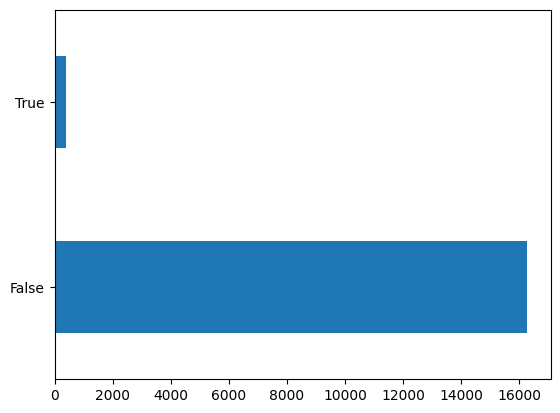

In [318]:
#Separando a variavel resposta das demais:
x = data.drop('mau',axis=1)

#Distribuição da variavel:
y = data.mau
y.unique() #array([False,  True])
contagem_y = y.value_counts()
contagem_y.plot(kind='barh')

#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável. 
    Dica: 
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis, 
        3. conte o número de categorias dessa variável 
        4. acumule essa informação de 3. na lista que você criou em 1. 
        5. No final, essa lista pode ser atribuída à nossa variável.
3. Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}.

In [319]:
#1:
variaveis = data.columns.tolist()
tipos = data.dtypes
df = pd.DataFrame({'Variaveis': variaveis, 'Tipos de dados': tipos.values})
df

,Variaveis,Tipos de dados
0,sexo,object
1,posse_de_veiculo,object
2,posse_de_imovel,object
3,qtd_filhos,int64
4,tipo_renda,object
5,educacao,object
6,estado_civil,object
7,tipo_residencia,object
8,idade,float64
9,tempo_emprego,float64


In [320]:
#2
qtd_categorias = []

for var in df['Variaveis']:
    if df.loc[df['Variaveis'] == var, 'Tipos de dados'].iloc[0] == 'object' or 'bool':
        qtd_categorias.append(len(data[var].value_counts()))
    else:
        qtd_categorias.append(None)
df['qtd_categorias'] = qtd_categorias
print(df)

                Variaveis Tipos de dados  qtd_categorias
0                    sexo         object               2
1        posse_de_veiculo         object               2
2         posse_de_imovel         object               2
3              qtd_filhos          int64               8
4              tipo_renda         object               5
5                educacao         object               5
6            estado_civil         object               5
7         tipo_residencia         object               6
8                   idade        float64            5298
9           tempo_emprego        float64            3005
10         possui_celular          int64               1
11  possui_fone_comercial          int64               2
12            possui_fone          int64               2
13           possui_email          int64               2
14  qt_pessoas_residencia        float64               9
15                    mau           bool               2


#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [321]:
data.sexo = data.sexo.map({'F': 1, 'M':0})
#data.posse_de_veiculo = data.posse_de_veiculo.map({'Y': 1, 'N':0})
data.posse_de_imovel = data.posse_de_imovel.map({'Y': 1, 'N':0})
data


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,0,Y,1,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,1,N,1,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,1,N,1,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,0,Y,1,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,1,Y,0,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,1,N,1,0,Working,Secondary / secondary special,Civil marriage,House / apartment,54.109589,9.884932,1,0,0,0,2.0,True
16646,1,N,1,0,Commercial associate,Secondary / secondary special,Married,House / apartment,43.389041,7.380822,1,1,1,0,2.0,True
16647,0,Y,1,0,Working,Secondary / secondary special,Married,House / apartment,30.005479,9.800000,1,1,0,0,2.0,True
16648,0,Y,1,0,Working,Secondary / secondary special,Married,House / apartment,30.005479,9.800000,1,1,0,0,2.0,True


#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [322]:
tabelaCruzada1 = pd.crosstab(index = y, columns=[data['possui_email'], data['posse_de_veiculo']])

df_crosstab_freq = tabelaCruzada1.div(tabelaCruzada1.sum(axis=0), axis=1).reset_index()

df_crosstab_freq


possui_email        mau         0                   1          
posse_de_veiculo                N         Y         N         Y
0                 False  0.975056  0.978212  0.983274  0.975117
1                  True  0.024944  0.021788  0.016726  0.024883

Nas linhas temos as porcentagens de bons e maus pagadores levando em consideração se eles possuem ou não email e/ou veiculo.
Analisando a coluna onde "Posse de veiculo == 0"/"possui email == 1" percebemos uma inadimplecia de 0.0167% enquanto qando temos "Posse de veiculo == 1"/"possui email == 0" percebemos uma inadimplecia de 0.0218%, chegando a conclusão de que possuir veiculo faz com que a pessoa tenha um maior risco de inadimplecia 

In [323]:
tabelaCruzada1 = pd.crosstab(index = y, columns=[data['possui_email']])
tabelaCruzada1

tabelaCruzada2 = pd.crosstab(index = y, columns=[data['posse_de_veiculo']])
tabelaCruzada2

tabelaCruzada = pd.concat([tabelaCruzada1, tabelaCruzada2], axis= 1)
tabelaCruzada.div(tabelaCruzada.sum(axis=0), axis=1).reset_index()

,mau,0,1,N,Y
0,False,0.976269,0.97973,0.975732,0.977905
1,True,0.023731,0.02027,0.024268,0.022095


#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [324]:
#Setando a variavel como dummie para salva-la 
data.posse_de_veiculo = data.posse_de_veiculo.map({'Y': 1, 'N':0})
data.to_csv('dados_exercicio_7.csv', index=False)